Qs = fluxo de calor através do ar, saindo do recipiente
Qr = *      *   *    *      *  recipiente
Qp = *     *     *    *     *   *, saindo das paredes externas

In [32]:
#importando as bibliotecas
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

agora os dados experimentais:

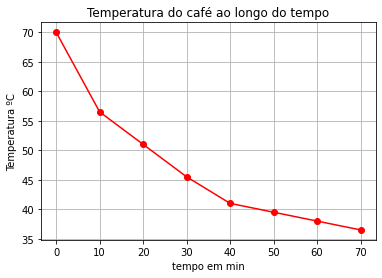

In [33]:
eixo_x = [0,10,20,30,40,50,60,70]
eixo_y = [70,56.5,51,45.5,41,39.5,38,36.5]


plt.plot(eixo_x,eixo_y, "r-o")
plt.ylabel("Temperatura ºC")
plt.xlabel("tempo em min")
plt.title("Temperatura do café ao longo do tempo")
plt.grid(True)
plt.show()

agora a primeira iteração
definindo as constantes

In [34]:
# raio interno
rin = 3.5e-2
# raio externo
rex = 4e-2
#altura
h = 9.5e-2
#espessura copo
e=5e-3

#densidade da água kg/m3
dc=1000
#densidade do recipiente (ceramica) (2000 --> 30000) kg/m³
drec= 2500
#volume de café - vamos deixar 1cm abaixo da altura do recipiente
# recipiente tem 2*pi*3,5*9,5 (raio de 3,5 cm e altura de 9,5 cm) e espessura de 5 mm
vc=((math.pi)*rin**2)*(8.0e-2)
#volume do recipiente, raio externo de 4 cm
vr=math.pi*h*(rex**2 - rin**2) + (math.pi*(rex**2)*e)
#massa de café
mc=dc*vc
#massa do recipiente
mr=drec*vr
#calor específico da água (J/(kg*K))
cc= 4186
#calor específico da ceramica (J/(kg*K))
cr= 878
#temperatura ambiente, em kelvin
Ta=25+273.15
# raio médio
rm = (rex + rin)/2
#área da superfície de contato entre o café e o ar
As=math.pi*rin**2
#área de contato da parede externa do recipiente
Ap=2*math.pi*rex*h
#área de contato das paredes internas recipiente (altura total menos a expessura da base)
Ar=2*math.pi*rin*(8e-2)
#condutividade térmica do ceramica W/m*k
kr=0.46
#coeficiente de transferência convectiva da superfície d para o ar --> 10W/m2k
hs=22
#coeficiente de transferência convectiva das paredes do recipiente para o ar --> 10W/m2k
hp=22

print("o volume do recipiente é {} cm³".format(vr*(1e6)))

o volume do recipiente é 137.05197951285467 cm³


In [35]:
#implementar a função que derivada
#IMPLEMENTE AQUI SUA FUNÇÃO QUE SERÁ USADA NO ODEINT

def derivada(x,t):
    # o primeiro parametro da função é a variavel a ser analisada
    # ela é um vetor pela definição da odeint
    # a primeira posição é Tcafé e na segunga Trecipiente
    Tc = x[0] 
    Tr = x[1] 
    Qs=(Tc-Ta)/(1/(hs*As))
    Qr=(Tc-Tr)/(math.log(rm/rin)/(2*math.pi*kr*h))
    Qp=(Tr-Ta)/((math.log(rex/rm)/(2*math.pi*kr*h))+(1/(hp*Ap))) 
    dTcdt=(-Qs-Qr)/(mc*cc)
    dTrdt=(Qr-Qp)/(mr*cr)
    dxdt=[dTcdt, dTrdt]
    return dxdt

####################### agora usar odeint########################

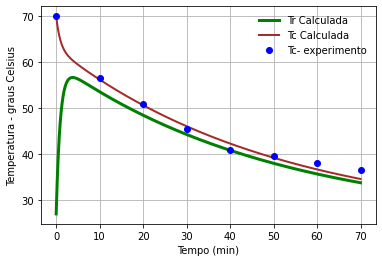

In [36]:
## agora o odeint
#IMPLEMENTE AQUI A PRIMEIRA ITERAÇÃO DO MODELO

lisTempo = np.arange(0,4200 , 1)
#condições iniciais: temperatura inicial do café do recipiente = temperatura ambiente
Tc = 70 + 273.15
Tr= 25+275.15
ci=[Tc, Tr]
#executando o odeint
x=odeint(derivada, ci, lisTempo)
#conversão de unidades
lisTcCelsius=[temp-273.15 for temp in x[:,0]]
lisTrCelsius=[temp-273.15 for temp in x[:,1]]
lisTempoMin=[t/60 for t in lisTempo]
#plotando o gráfico como pedido
ax=plt.axes()
plt.plot(lisTempoMin, lisTrCelsius, color='green', linewidth=3, label='Tr Calculada')
plt.plot(lisTempoMin, lisTcCelsius, color='brown', linewidth=2, label='Tc Calculada')
# ainda não medimos a temperatura do cefé
#plt.plot(TempoExp, TemperaturaExp, 'ro', label='To Medida')
plt.plot(eixo_x,eixo_y, "bo", label= "Tc- experimento")
plt.ylabel("Temperatura - graus Celsius")
plt.xlabel("Tempo (min)")
plt.legend(loc='best', fancybox=True, framealpha=0)
plt.grid(True)
plt.show()

Válidação

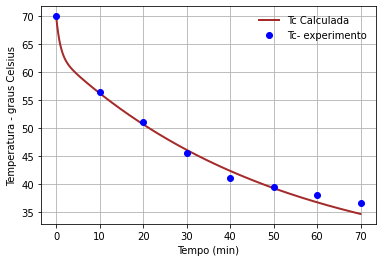

In [37]:
# COMPARAÇÃO DOS VALORES OBTIDOS-- DA TEMPERATURA DA XICARA
plt.plot(lisTempoMin, lisTcCelsius, color='brown', linewidth=2, label='Tc Calculada')
plt.plot(eixo_x,eixo_y, "bo", label= "Tc- experimento")
plt.ylabel("Temperatura - graus Celsius")
plt.xlabel("Tempo (min)")
plt.legend(loc='best', fancybox=True, framealpha=0)
plt.grid(True)
plt.show()

Agora vamos gerar o nosso gráfico conclusivo
vamos variar o tamanho da caneca e verificar o quando isso afeta no tempo até o café chegar a uma temperatura ruim de tomar,
próximo de 40ºC.

In [38]:
def quando40(Tccelsius, lisTempoMin):
    quando20= 0
    i=0
    while Tccelsius[i]<=40:
        quando40=lisTempoMin[i]
        i+=1
    return quando40

def derivada_1(x,t,escala):
    # com os parametros dados vamos variar o tamanho do copo
    vr *= escala 
    Tc = x[0] 
    Tr = x[1]
    math.pi*h*(rex**2 - rin**2) + (math.pi*(rex**2)*e)
    Qs=(Tc-Ta)/(1/(hs*As))
    Qr=(Tc-Tr)/(math.log(rm/rin)/(2*math.pi*kr*h))
    Qp=(Tr-Ta)/((math.log(rex/rm)/(2*math.pi*kr*h))+(1/(hp*Ap))) 
    dTcdt=(-Qs-Qr)/(mc*cc)
    dTrdt=(Qr-Qp)/(mr*cr)
    dxdt=[dTcdt, dTrdt]
    return dxdt

# vamos criar um vetor que represente a escala que vamos multiplicar o copo usado na primeira iteração
escala_lista=np.arange(0.1,10, 0.01)
lisTemposAte40=[]

for escala in escala_lista:
    #executando o odeint
    Solucao=odeint(derivada_1, ci, lisTempo, args=(escala,))
    #conversão de unidades
    lisTempCelsius=[temp-273.15 for temp in Solucao[:,0]]
    lisTempoMin=[t/60 for t in lisTempo]
    #plotando o gráfico como pedido
    plt.plot(lisTempoH, lisTempCelsius, label=("Escala=%.3f" %(escala)))
    #encontra o tempo necessário para atingir 40 graus
    lisTemposAte40.append(TempoAte40graus(lisTempCelsius, lisTempoMin))

    
plt.ylabel("Temperatura do Café - graus Celsius")
plt.xlabel("Tempo (h)")
plt.legend(loc='best')
plt.grid(True)
plt.show()
  
    
#plotando o gráfico conclusivo
ax=plt.axes()
ax.set_facecolor('xkcd:ivory')
plt.title("Gráfico conclusivo")
plt.plot(escala_lista, lisTemposAte40, 'r-o')
plt.xlabel("Escala em relação ao copo usado na primeira iteração")
plt.ylabel("Tempo para atingir 40")
plt.grid(True)
plt.show()


UnboundLocalError: local variable 'vr' referenced before assignment

In [ ]:
#POSSÍVEL GRÁFICO- DENSIDADE DA CERAMICA PELO TEMPO DE RESFRIAMENTO 